In [1]:
# Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
# Data collection and processing
# loading the dataset to pandas dataframe
car_dataset = pd.read_csv('./car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# checking the distribution of categorical data
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
# Encoding the categorical data
# encoding "Fuel_Type"
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [13]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
# Splitting the data into train and test
X = car_dataset.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Model Training
1. Linear Regression

In [17]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [18]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [19]:
# Model evaluation on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [20]:
# R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error on training data: ", error_score)

R squared error on training data:  0.8799451660493708


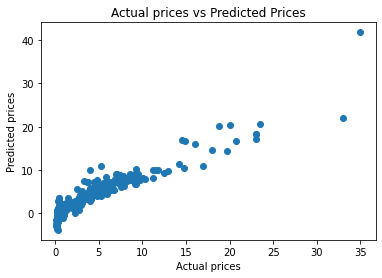

In [28]:
# Visualize the actual prices and Predicted prices
plt.scatter(Y_train, training_data_prediction, cmap='Red')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title('Actual prices vs Predicted Prices')
plt.show()

In [29]:
# predicting for test data
test_data_prediction = lin_reg_model.predict(X_test)

In [30]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error on test data: ", error_score)

R squared error on test data:  0.8365766715026374


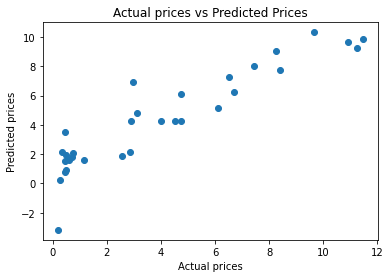

In [35]:
# test prediction visulization
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title('Actual prices vs Predicted Prices')
plt.show()

2. Lasso Regression

In [31]:
lasso = Lasso()

In [32]:
lasso.fit(X_train, Y_train)

Lasso()

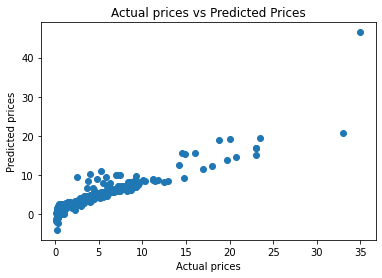

In [34]:
training_data_prediction = lasso.predict(X_train)
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title('Actual prices vs Predicted Prices')
plt.show()

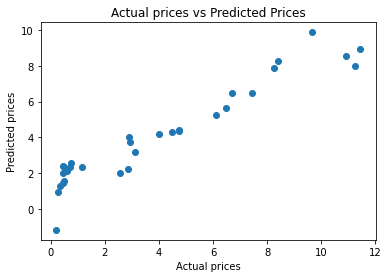

In [36]:
test_data_prediction = lasso.predict(X_test)
# test prediction visulization
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title('Actual prices vs Predicted Prices')
plt.show()